# resale cars price prediction

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [276]:
cars= pd.read_csv('./Data sets for ML/cardekho.csv')

In [277]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [280]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


# Data cleaning 

In [281]:
def isFloat(i):
    try:
        return float(i)
    except:
        return np.nan

In [282]:
cars['max_power']=cars.max_power.apply(isFloat)

### replacing nan values with median

In [283]:
 for i in ['mileage(km/ltr/kg)','engine','max_power','seats']:
        cars[i].fillna(cars[i].median(), inplace=True)

In [284]:
cars['brands']=cars.name.apply(lambda x: x.split()[0])

# Basic EDA on selling price

In [293]:
cars.groupby('owner').selling_price.count()

owner
First Owner             5289
Fourth & Above Owner     174
Second Owner            2105
Test Drive Car             5
Third Owner              555
Name: selling_price, dtype: int64

In [294]:
cars.pivot_table(index=['fuel', 'owner'], values='selling_price', aggfunc='mean')

selling_price
fuel   owner                              
CNG    First Owner            3.540293e+05
       Fourth & Above Owner   1.895000e+05
       Second Owner           2.330556e+05
       Third Owner            1.823333e+05
Diesel First Owner            9.792325e+05
       Fourth & Above Owner   3.170056e+05
       Second Owner           4.912978e+05
       Test Drive Car         1.350000e+06
       Third Owner            3.779866e+05
LPG    First Owner            2.508824e+05
       Fourth & Above Owner   1.350000e+05
       Second Owner           1.640714e+05
       Third Owner            1.568000e+05
Petrol First Owner            5.668341e+05
       Fourth & Above Owner   1.310488e+05
       Second Owner           2.586365e+05
       Test Drive Car         5.167250e+06
       Third Owner            1.846488e+05

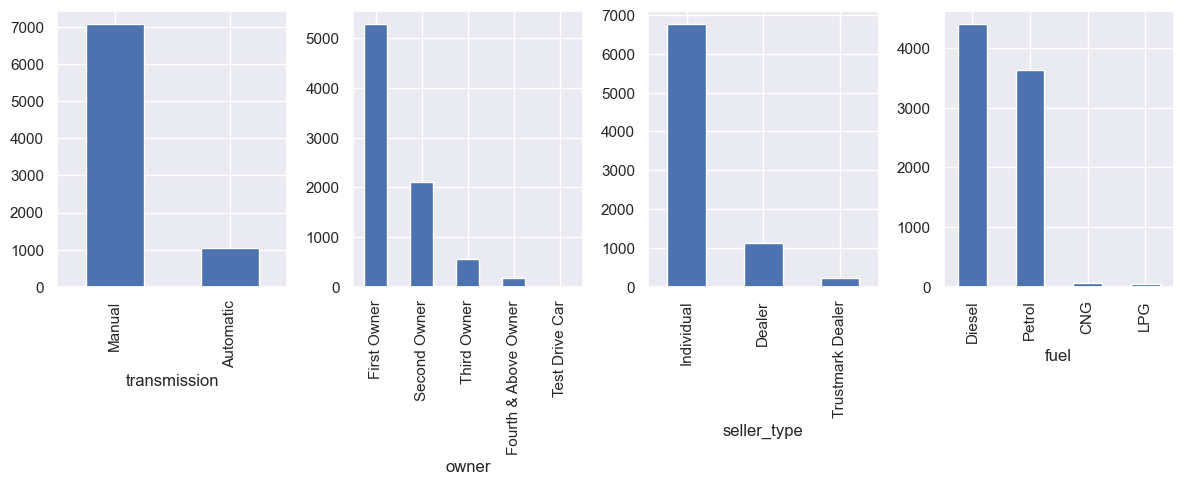

In [285]:
sns.set_theme()
fig, ax = plt.subplots(1,4, figsize=(12,5))
for i,j in enumerate(['transmission','owner','seller_type', 'fuel']):
    cars[j].value_counts().plot(kind='bar', ax=ax[i])
plt.tight_layout()


# cars.seller_type.value_counts().plot(kind='bar')

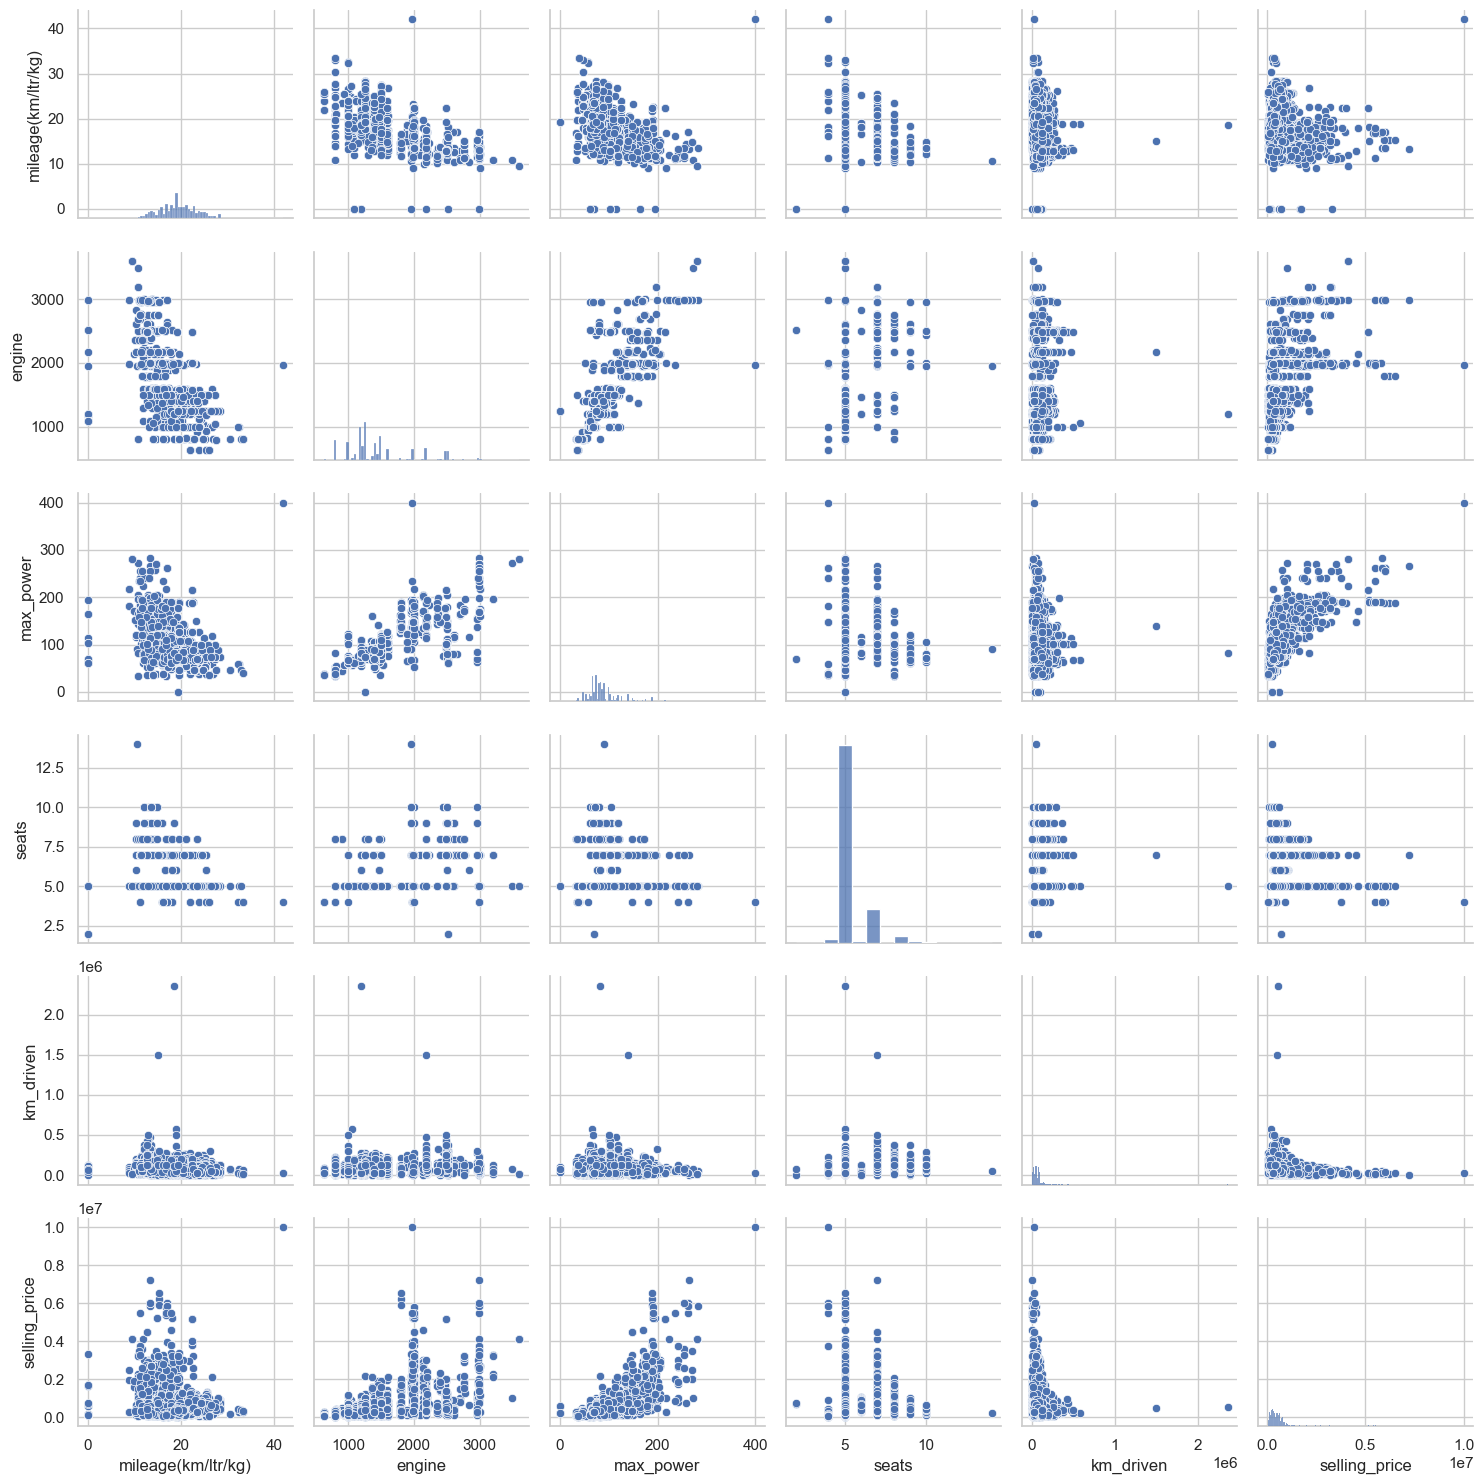

In [292]:
sns.set_theme(style='whitegrid')
sns.pairplot(cars,vars=["mileage(km/ltr/kg)", "engine", "max_power", "seats", "km_driven", "selling_price"])
plt.tight_layout()

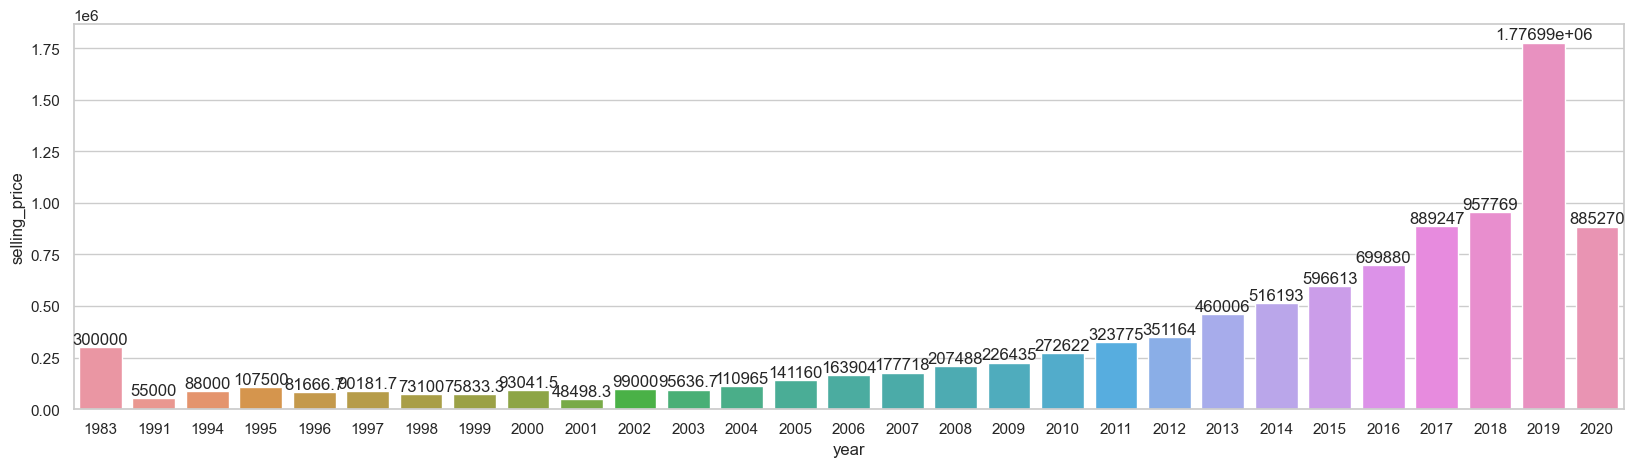

In [287]:

fig,axes=plt.subplots(figsize=(20,5))
y = cars.groupby('year').selling_price.mean()
x = cars.groupby('year').selling_price.mean().index
sns.barplot(x=x,y=y)
for container in axes.containers:
        axes.bar_label(container)
# axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [297]:

def sellavg(name, meancol, axes):
    y = cars.groupby(name)[meancol].mean()
    x = cars.groupby(name)[meancol].mean().index
    z = cars.groupby(name)[meancol].count()
    sns.barplot(x=x,y=y, ax=axes[0])
    sns.barplot(x=x,y=z, ax=axes[1])
    for i in range(len(axes)):
        for container in axes[i].containers:
                axes[i].bar_label(container)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

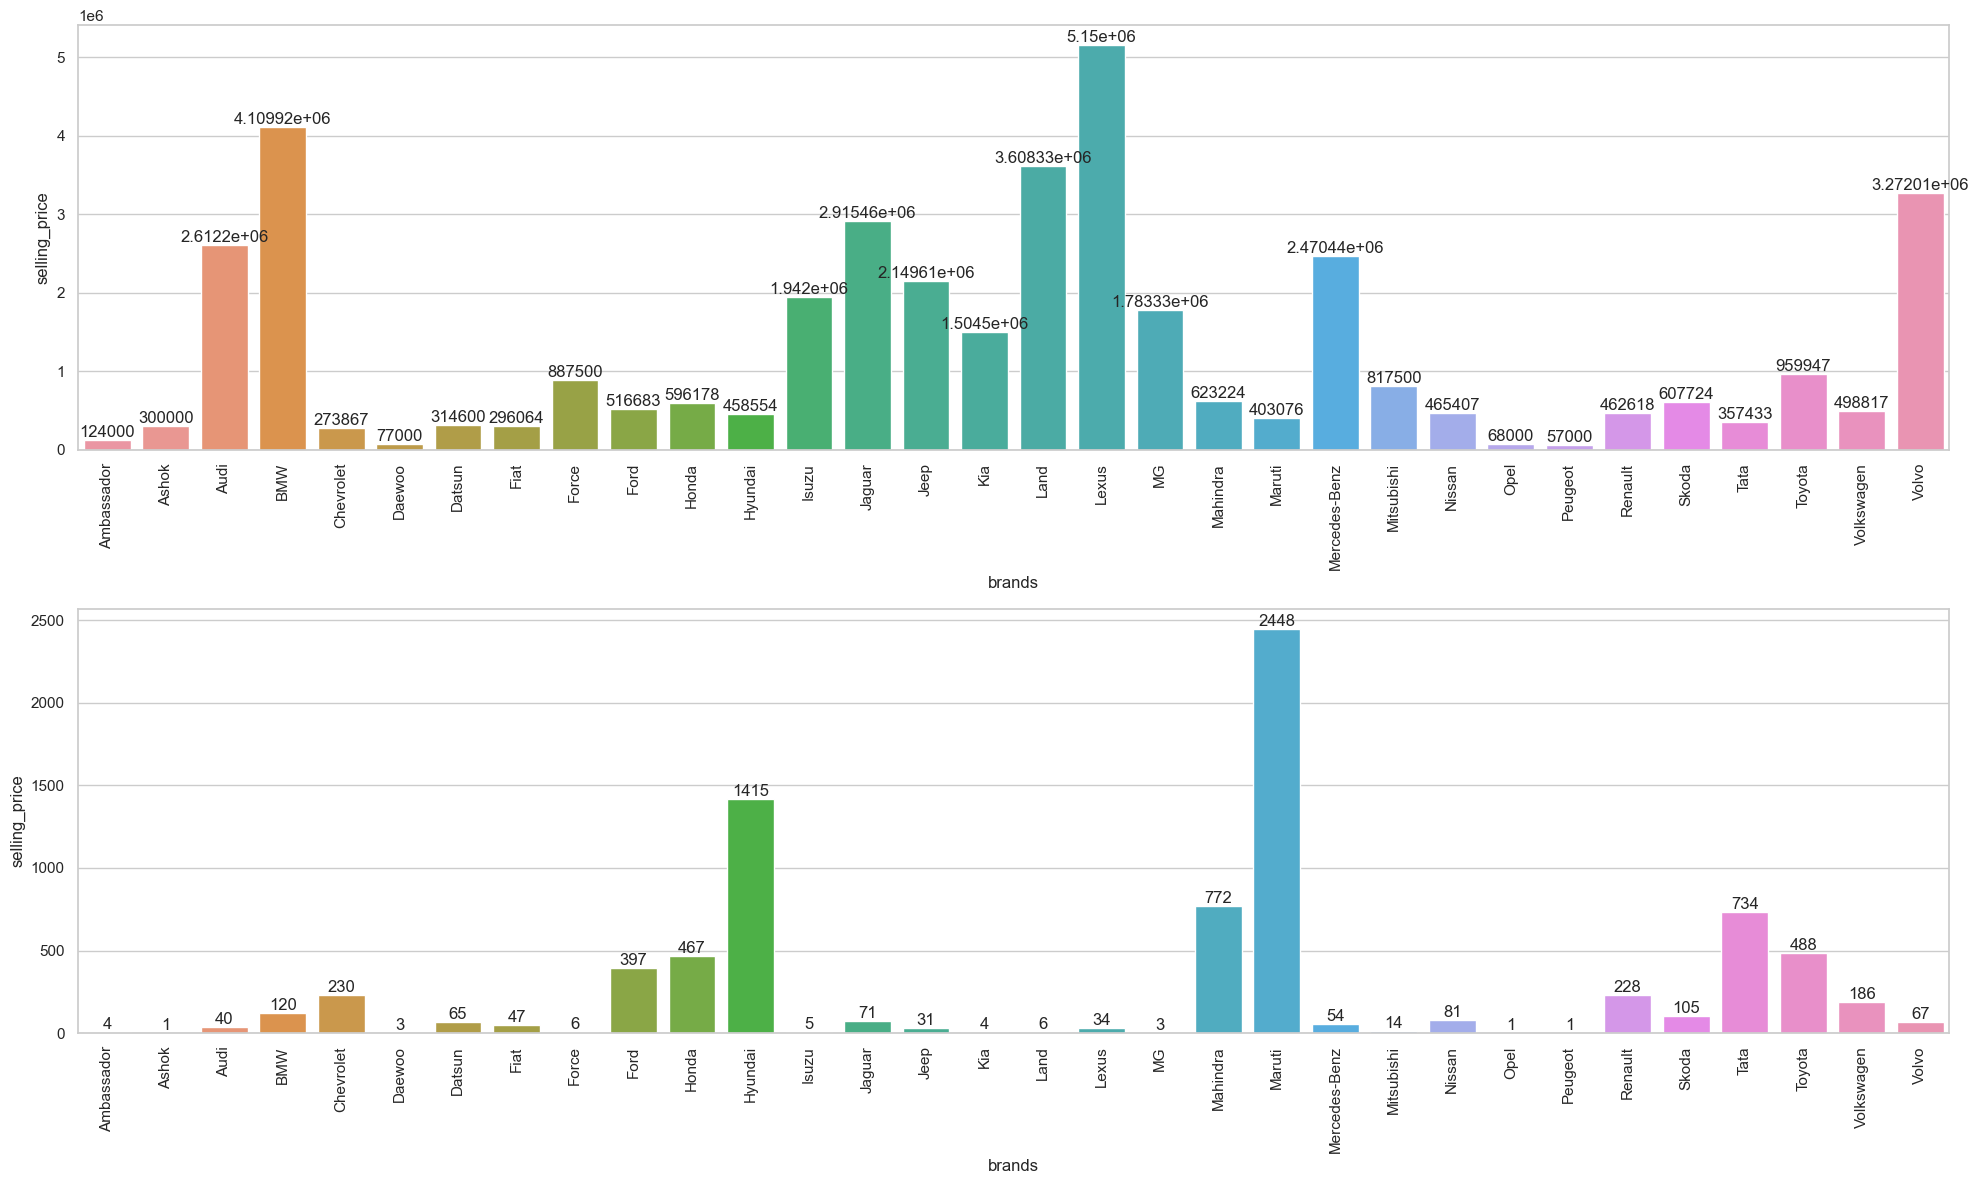

In [298]:
fig,axes=plt.subplots(2,1,figsize=(20,12))
sellavg('brands','selling_price', axes)
plt.tight_layout()

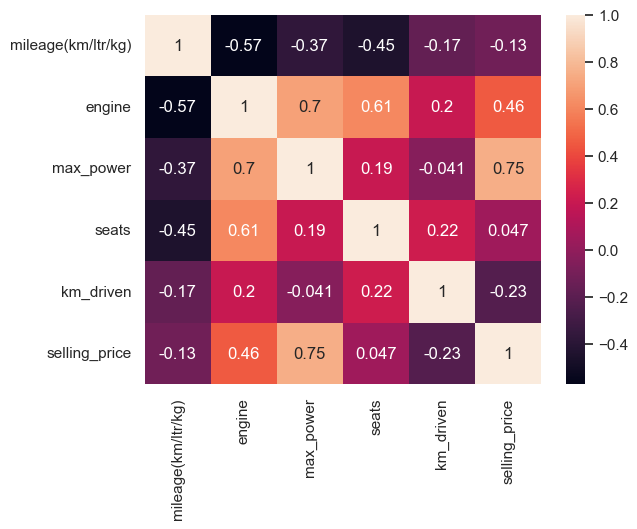

In [300]:
numericals = ["mileage(km/ltr/kg)", "engine", "max_power", "seats", "km_driven", "selling_price"]
corr = cars[numericals].corr()
sns.heatmap(corr, annot=True)
plt.show()